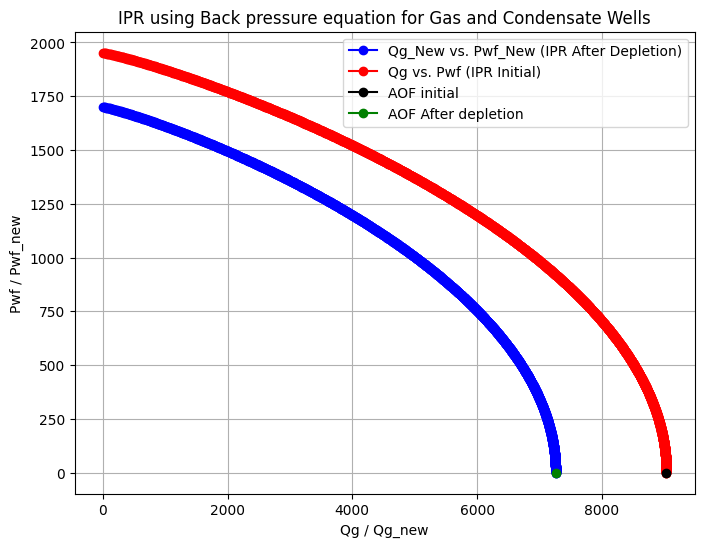

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
pr = 1952  # psi  Initial reservoir pressure
prf = 1700  # psi reservoir pressure after depletion  " f => final"
# Test data ( Get from DST, Drawdown Build up test....)
Pwf = np.array([1700, 1500, 1300])
Qg = np.array([2624.6, 4154.7, 5425.1])  # avoid to inclure Qo = 0 in the data when we use plot loglog can generate errors

# from PVT study (This data used when we generate the IPR data for the well when the reservoir pressure drops from 1952 to 1700 psi )
ug1_z1=0.01206 # at pr = 1952 psi
ug2_z2=0.01180 # at pr = 1700 psi

# Calculate (pr**2 - Pwf**2)
result = pr**2 - Pwf**2


# Perform linear regression in log-log space
log_Qg = np.log(Qg)
log_result = np.log(result)
slope, intercept, r_value, p_value, std_err = linregress(log_Qg, log_result)

# to get the n and C
n=1/slope
C=Qg[0]/((pr**2-Pwf[0]**2)**n)



# Create an array of Pwf values from pr down to 0 for initial reservoir pressure pr =1952
Pwf_values = np.arange(pr, -1, -1)  # Start from pr and go down to 0

# Calculate Qg for each Pwf using the equation for initial reservoir pressure pr =1952
Qg_values = C * (pr**2 - Pwf_values**2)**n
AOF = C * (pr**2 )**n  # Pwf_values**2 == 0 to get AOf (Absolute open flow)<=> Qo max at Pwf=Pr
# To conform with the equation as written in the book.
C1=C
# Calculate Cf after depletion
C2=C1*( ug1_z1 / ug2_z2 ) # Prf = reservoir pressure after depletion

Pwf_values_f = np.arange(prf, -1, -1)  # Start from prf and go down to 0
Qg_values_f = C2 * (prf**2 - Pwf_values_f**2)**n
AOF_f = C2 * (prf**2 )**n  # Pwf_values_f **2 == 0 to get AOf after depletion


# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(Qg_values_f,Pwf_values_f , marker='o', linestyle='-', color='b', label='Qg_New vs. Pwf_New (IPR After Depletion)')
plt.plot(Qg_values,Pwf_values , marker='o', linestyle='-', color='r', label='Qg vs. Pwf (IPR Initial)')
plt.plot(AOF,0, color='black', marker='o', label='AOF initial')
plt.plot(AOF_f,0, color='g', marker ='o', label='AOF After depletion')

plt.grid(True)
plt.xlabel('Qg / Qg_new')
plt.ylabel('Pwf / Pwf_new')
plt.title('IPR using Back pressure equation for Gas and Condensate Wells')

plt.legend()
plt.show()
